In [143]:
from bertopic import BERTopic
import pandas as pd
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from utils import clean_traffic


In [144]:

def most_visited_topic_cluster(df,topics_count):
    topic_stats = df.groupby('topic')['traffic_numeric'].agg(['mean', 'median'])
    max = {"mean":0,"topic":None}
    r = range(0,topics_count)
    for i in r:
        element = topic_stats['mean'][i]
        comp = max["mean"]
        if element >= comp:
            max['mean'] = element
            max['topic'] = i
    return max

def max_element(List):
    list_max_element = 0
    for e in List:
        if e > list_max_element:
            list_max_element = e
    return list_max_element

In [ ]:
data = pd.read_csv("../preprocessed_data/cleaned_data_USA.csv")    
# data = pd.read_csv("../preprocessed_data/cleaned_data_UK.csv")    
# data = pd.read_csv("../preprocessed_data/cleaned_data_CANADA.csv")    
# data = pd.read_csv("../preprocessed_data/cleaned_data_Denmark.csv")    

dataFrame = data[['newsTitle']]
strings_list = [item[0] for item in dataFrame.values.tolist()]
strings_list = [text for text in strings_list if detect(text) == "en"]
# strings_list = [text for text in strings_list if len(text.split()) > 3]



In [146]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(strings_list, show_progress_bar=True)

Batches: 100%|██████████| 89/89 [00:12<00:00,  7.37it/s]


In [147]:
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [148]:
hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [149]:
french_stop_words = ["le", "la", "les", "de", "du", "des", "et", "un", "une", "ce", "cette", "ces", "avec", "pour", "sur", "par"]

vectorizer_model = CountVectorizer(stop_words="english")

In [150]:

keybert_model = KeyBERTInspired()

pos_model = PartOfSpeech("en_core_web_sm")

mmr_model = MaximalMarginalRelevance(diversity=0.3)

representation_model = {
    "KeyBERT": keybert_model,
    "MMR": mmr_model,
    "POS": pos_model
}

In [153]:


topic_model = BERTopic(
embedding_model=embedding_model,
umap_model=umap_model,
hdbscan_model=hdbscan_model,
vectorizer_model=vectorizer_model,
representation_model=representation_model,
top_n_words=10,
verbose=True
)

topics, probs = topic_model.fit_transform(strings_list)
topic_model.update_topics(strings_list, n_gram_range=(1,3))

names = topic_model.get_topic_info().Name
topic_model.get_topic_info()

2024-12-02 19:32:11,900 - BERTopic - Embedding - Transforming documents to embeddings.


Batches: 100%|██████████| 89/89 [00:10<00:00,  8.52it/s]
2024-12-02 19:32:22,384 - BERTopic - Embedding - Completed ✓
2024-12-02 19:32:22,385 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-02 19:32:33,344 - BERTopic - Dimensionality - Completed ✓
2024-12-02 19:32:33,346 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-02 19:32:33,470 - BERTopic - Cluster - Completed ✓
2024-12-02 19:32:33,483 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-02 19:32:43,707 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,KeyBERT,MMR,POS,Representative_Docs
0,-1,993,-1_the_to_of_in,"[the, to, of, in, and, on, is, for, trump, with]","[melania, carrie, britney, trump, nicole, kim,...","[live, watch, trumps, white, season, news, bab...","[new, star, video, years, white, season, peopl...",[Antonio Brown could be fined for Facebook Liv...
1,0,219,0_nfl_to_super_super bowl,"[nfl, to, super, super bowl, the, bowl, patrio...","[nfl, packers, falcons, playoff, playoffs, cow...","[nfl, packers, cowboys, seahawks, redskins, 20...","[draft, playoff, loss, playoffs, score, team, ...",[2017 NFL Playoff Odds Atlanta Falcons Vs Gree...
2,1,175,1_basketball_ncaa_tournament_bowl,"[basketball, ncaa, tournament, bowl, state, fo...","[ncaa, clemson, uconn, louisville, ucla, gonza...","[ncaa, carolina, duke, gonzaga, championship, ...","[basketball, tournament, football, state, coll...",[College Football Playoff Clemson vs Ohio Stat...
3,2,170,2_nba_warriors_game_the,"[nba, warriors, game, the, in, lebron, cavs, c...","[cavs, lebron, cavaliers, nba, nbas, warriors,...","[nba, warriors, lebron, cavs, trade, celtics, ...","[trade, points, playoffs, knee, left, win, res...",[The Cavaliers should still be concerned despi...
4,3,116,3_day_valentines_easter_2017,"[day, valentines, easter, 2017, valentines day...","[holiday, patricks, celebrate, st, valentines,...","[valentines, easter, patricks, st, friday, chr...","[day, year, open, food, hours, deals, buy, hap...","[A History Of St Patricks Day In Minnesota, Ne..."
5,4,108,4_trailer_the_review_film,"[trailer, the, review, film, movie, first, of ...","[trailer, furious, movie, premiere, rogue, fil...","[trailer, logan, marvel, batman, guardians, wa...","[trailer, film, movie, review, new, epic, thin...","[REVIEW The LEGO Batman Movie, Rogue One A Sta..."
6,5,99,5_dies_dies at_at_dead,"[dies, dies at, at, dead, death, of, dead at, ...","[deaths, died, dies, death, dead, suicide, act...","[dies, dead, actor, deaths, suicide, george, j...","[dead, death, star, heart, actor, condition, d...",[Margaret Whitton star of Major League dies at...
7,6,90,6_madrid_real_league_real madrid,"[madrid, real, league, real madrid, barcelona,...","[madrid, barcelona, barcelonas, madrids, liga,...","[madrid, real, barcelona, liga, champions, ars...","[goals, live, stream, online, quarterfinal, dr...",[La Liga Luis Suarez double keeps FC Barcelona...
8,7,74,7_tour_album_new_new album,"[tour, album, new, new album, kendrick, announ...","[kendrick, tour, concert, album, mixtape, song...","[kendrick, mixtape, song, gorillaz, concert, m...","[tour, album, new, lineup, song, concert, date...",[Kendrick Lamars Damn Everything we know about...
9,8,62,8_oscars_awards_oscar_globes,"[oscars, awards, oscar, globes, golden, grammy...","[oscar, oscars, oscarever, awards, nominations...","[oscars, awards, oscar, grammys, 2017, manches...","[best, winners, actor, performance, carpet, tr...",[Date Night Mel Gibson and Rosalind Ross Step ...


In [154]:
df = pd.DataFrame({'topic':topics, 'probs':probs})
df['date'] = data[['date']]
df['traffic'] = data[['traffic']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)
df


,topic,probs,date,traffic,traffic_numeric
0,3,0.840494,2016-11-28,"500,000+",500000
1,-1,0.000000,2016-11-28,"200,000+",200000
2,9,0.589742,2016-11-28,"100,000+",100000
3,0,1.000000,2016-11-28,"200,000+",200000
4,-1,0.000000,2016-11-28,"200,000+",200000
...,...,...,...,...,...
2836,12,1.000000,2017-04-27,"200,000+",200000
2837,2,1.000000,2017-04-27,"200,000+",200000
2838,-1,0.000000,2017-04-27,"20,000+",20000
2839,4,0.792753,2017-04-27,"20,000+",20000


In [155]:
max = most_visited_topic_cluster(df,max_element(topics))
print(max)
topic_stats = df.groupby('topic')['traffic_numeric'].agg(['mean', 'median']).sort_values('mean',ascending=False)
print(topic_stats['mean'])


{'mean': 576190.4761904762, 'topic': 26}
topic
 26    576190.476190
 32    481875.000000
 21    480833.333333
 15    459310.344828
 23    350909.090909
 3     316120.689655
 37    301666.666667
 20    276666.666667
 38    263333.333333
 33    224285.714286
 18    217407.407407
 29    201666.666667
 7     196486.486486
 36    193846.153846
 12    183414.634146
-1     177562.940584
 8     174516.129032
 2     163529.411765
 4     159814.814815
 19    158518.518519
 24    152857.142857
 34    147142.857143
 0     146484.018265
 1     144742.857143
 30    141666.666667
 9     140612.244898
 10    140232.558140
 11    137619.047619
 6     136333.333333
 5     127878.787879
 17    124827.586207
 27    122000.000000
 16    115862.068966
 35    112307.692308
 39    110000.000000
 14    106451.612903
 25    101428.571429
 31     93529.411765
 22     80000.000000
 28     78333.333333
 13     75675.675676
Name: mean, dtype: float64


In [156]:
topic_model.get_topic(max['topic'])

[('switch', 0.03826559803774777),
 ('pokémon', 0.03826559803774777),
 ('new', 0.03572007705356686),
 ('ios', 0.031127102845672883),
 ('nes', 0.031127102845672883),
 ('nes classic', 0.031127102845672883),
 ('nintendos', 0.029759488096550924),
 ('nintendo', 0.029759488096550924),
 ('apple', 0.027833298300989167),
 ('the', 0.027107123837098058)]

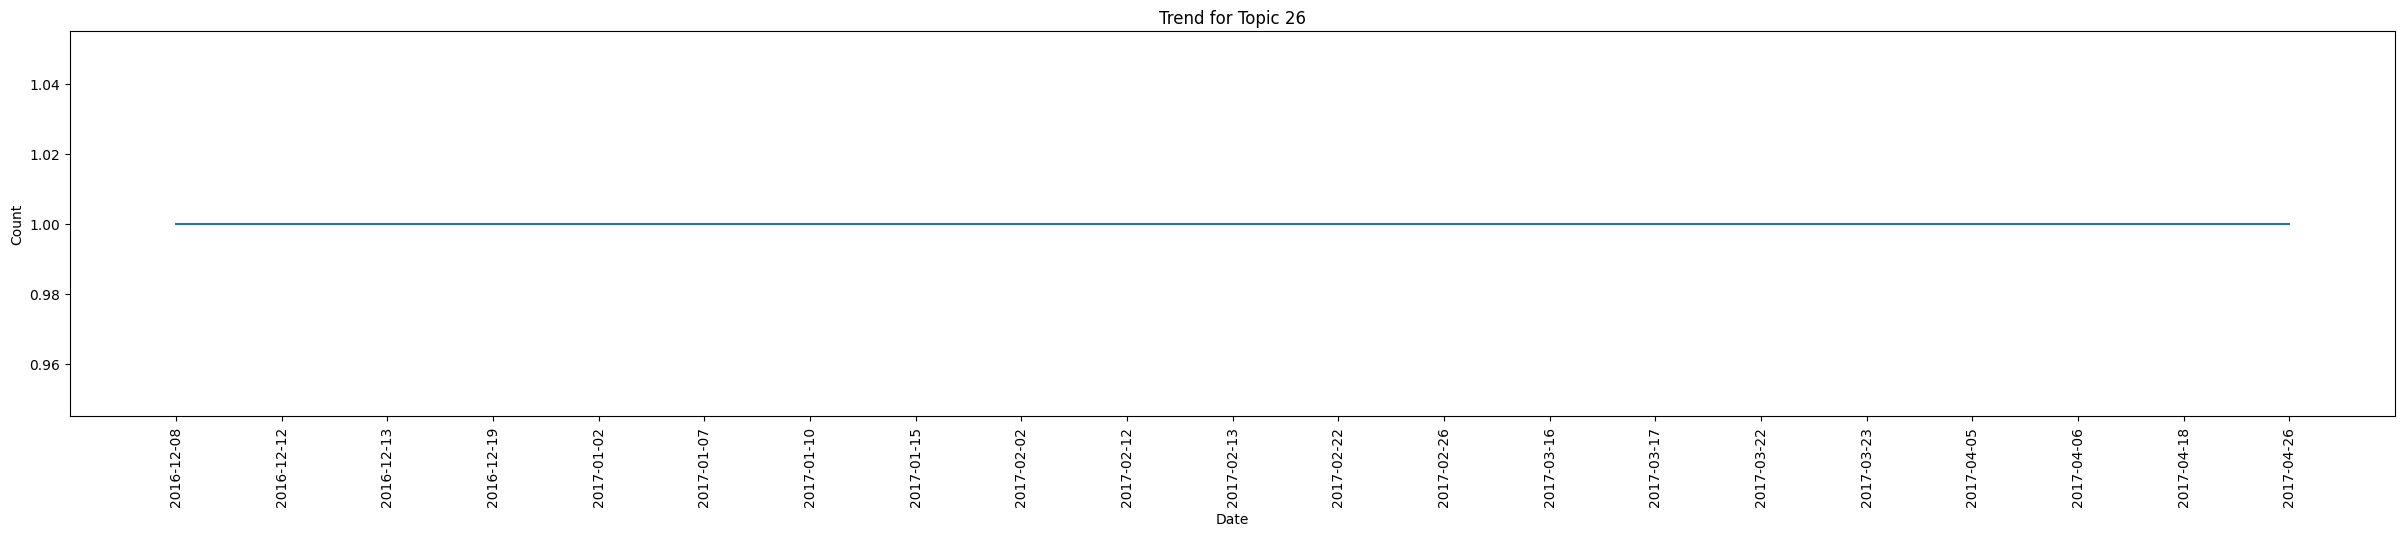

In [157]:
topic_time_distribution = df.groupby(['date', 'topic']).size().reset_index(name='count')
specific_topic = max['topic']
specific_topic_data = topic_time_distribution[topic_time_distribution['topic'] == specific_topic]
plt.figure(figsize=(30, 5))
sns.lineplot(data=specific_topic_data, x='date', y='count')
plt.title(f"Trend for Topic {specific_topic}")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()




In [158]:
names

0                                       -1_the_to_of_in
1                             0_nfl_to_super_super bowl
2                     1_basketball_ncaa_tournament_bowl
3                               2_nba_warriors_game_the
4                          3_day_valentines_easter_2017
5                             4_trailer_the_review_film
6                                5_dies_dies at_at_dead
7                      6_madrid_real_league_real madrid
8                            7_tour_album_new_new album
9                          8_oscars_awards_oscar_globes
10                                9_stock_musk_elon_dow
11             10_victorias_victorias secret_her_secret
12                           11_police_shooting_in_shot
13                   12_trump_obama_donald_donald trump
14                     13_baby_pregnant_child_expecting
15              14_tornado_warning_tornado warning_near
16                         15_recap_finale_premiere_the
17                16_arrested_released_jail_kevi

In [ ]:
topic_model.visualize_topics()